In [1312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [1313]:
df = pd.read_csv("./Covid_19 Dataset.csv")

In [1314]:
df.head()

,Unnamed: 0,country,continent,population,day,time,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,0,Afghanistan,Asia,40754388.0,2025-07-28,2025-07-28 16:15:05+00:00,15098.0,NaN,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,1,Albania,Europe,2866374.0,2025-07-28,2025-07-28 16:15:05+00:00,1025.0,NaN,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,2,Algeria,Africa,45350148.0,2025-07-28,2025-07-28 16:15:05+00:00,82068.0,NaN,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,3,Andorra,Europe,77463.0,2025-07-28,2025-07-28 16:15:06+00:00,NaN,NaN,48015,NaN,619844.0,2130.0,165.0,3225256.0,249838.0
4,4,Angola,Africa,35027343.0,2025-07-28,2025-07-28 16:15:06+00:00,1971.0,NaN,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


In [1315]:
df.tail()

,Unnamed: 0,country,continent,population,day,time,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
226,226,Wallis-and-Futuna,Oceania,10982.0,2025-07-28,2025-07-28 16:15:08+00:00,3104.0,NaN,3550,438.0,323256.0,728.0,8.0,1867419.0,20508.0
227,227,Western-Sahara,Africa,626161.0,2025-07-28,2025-07-28 16:15:09+00:00,0.0,NaN,10,9.0,16.0,2.0,1.0,NaN,NaN
228,228,Yemen,Asia,31154867.0,2025-07-28,2025-07-28 16:15:08+00:00,662.0,NaN,11945,9124.0,383.0,69.0,2159.0,10579.0,329592.0
229,229,Zambia,Africa,19470234.0,2025-07-28,2025-07-28 16:15:05+00:00,3919.0,NaN,349304,341316.0,17940.0,209.0,4069.0,211244.0,4112961.0
230,230,Zimbabwe,Africa,15331428.0,2025-07-28,2025-07-28 16:15:05+00:00,1731.0,12.0,266359,258888.0,17373.0,374.0,5740.0,164744.0,2525756.0


In [1316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       231 non-null    int64  
 1   country          231 non-null    object 
 2   continent        229 non-null    object 
 3   population       229 non-null    float64
 4   day              231 non-null    object 
 5   time             231 non-null    object 
 6   active_cases     184 non-null    float64
 7   critical_cases   52 non-null     float64
 8   total_cases      231 non-null    int64  
 9   recovered_cases  183 non-null    float64
 10  1M_pop_cases     229 non-null    float64
 11  1M_pop_deaths    224 non-null    float64
 12  total_deaths     226 non-null    float64
 13  1M_pop_tests     213 non-null    float64
 14  total_tests      213 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 27.2+ KB


## Data Cleaning

In [1317]:
df.drop(columns=["Unnamed: 0", "critical_cases", "day", "time"], axis=1, inplace=True)

Drop Columns

In [1318]:
df.head()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,15098.0,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,Albania,Europe,2866374.0,1025.0,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,Algeria,Africa,45350148.0,82068.0,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,Andorra,Europe,77463.0,NaN,48015,NaN,619844.0,2130.0,165.0,3225256.0,249838.0
4,Angola,Africa,35027343.0,1971.0,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


In [1319]:
df.describe()

,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
count,2.290000e+02,1.840000e+02,2.310000e+02,1.830000e+02,229.000000,224.000000,2.260000e+02,2.130000e+02,2.130000e+02
mean,3.469404e+07,3.323757e+04,3.050883e+06,3.063211e+06,202950.253275,1277.348214,3.102071e+04,2.155978e+06,3.298829e+07
std,1.386374e+08,1.654554e+05,1.002125e+07,1.024277e+07,206154.889634,1310.431844,1.103436e+05,3.647972e+06,1.198779e+08
min,7.990000e+02,0.000000e+00,9.000000e+00,2.000000e+00,16.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03
25%,4.454310e+05,2.875000e+01,2.636600e+04,1.902150e+04,18885.000000,172.750000,2.055000e+02,1.981990e+05,3.478150e+05
50%,5.797805e+06,5.390000e+02,2.068970e+05,1.870780e+05,128843.000000,846.500000,2.204500e+03,8.851190e+05,2.226216e+06
75%,2.210284e+07,5.842500e+03,1.348198e+06,1.503542e+06,333985.000000,2092.250000,1.480600e+04,2.439107e+06,1.346373e+07
max,1.448471e+09,1.783377e+06,1.118201e+08,1.098144e+08,771655.000000,6595.000000,1.219487e+06,2.330212e+07,1.186852e+09


In [1320]:
df.shape

(231, 11)

In [1321]:
df.isnull().sum()

country             0
continent           2
population          2
active_cases       47
total_cases         0
recovered_cases    48
1M_pop_cases        2
1M_pop_deaths       7
total_deaths        5
1M_pop_tests       18
total_tests        18
dtype: int64

In [1322]:
df.isnull().sum()*100/len(df)

country             0.000000
continent           0.865801
population          0.865801
active_cases       20.346320
total_cases         0.000000
recovered_cases    20.779221
1M_pop_cases        0.865801
1M_pop_deaths       3.030303
total_deaths        2.164502
1M_pop_tests        7.792208
total_tests         7.792208
dtype: float64

Visualisasi Missing Values

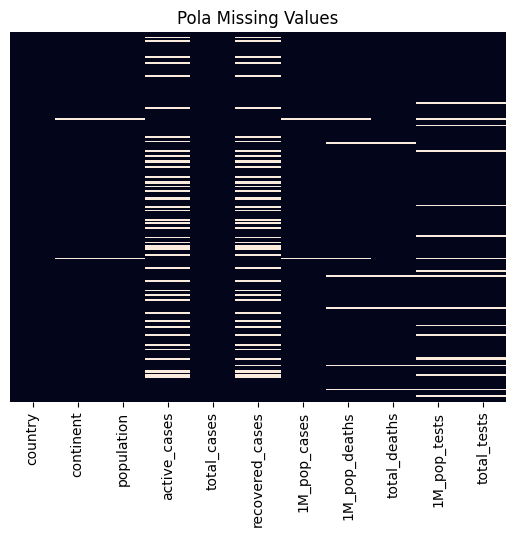

In [1323]:
"""Warna hitam = tidak ada missing value
Warna putih/terang = ada missing value"""

sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Pola Missing Values")
plt.show()

Fix Missing Values

In [1324]:
df["continent"] = df["continent"].fillna(df["continent"].mode()[0])
df["population"] = df["population"].fillna(df["population"].median())
df["1M_pop_cases"] = df["1M_pop_cases"].fillna(df["1M_pop_cases"].median())
df["1M_pop_deaths"] = df["1M_pop_deaths"].fillna(df["1M_pop_deaths"].median())
df["total_deaths"] = df["total_deaths"].fillna(df["total_deaths"].median())
df["1M_pop_tests"] = df["1M_pop_tests"].fillna(df["1M_pop_tests"].median())
df["total_tests"] = df["total_tests"].fillna(df["total_tests"].median())

imputer = SimpleImputer(strategy="median")

df[["active_cases","recovered_cases"]] = imputer.fit_transform(df[["active_cases","recovered_cases"]])

In [1325]:
df.isnull().sum()

country            0
continent          0
population         0
active_cases       0
total_cases        0
recovered_cases    0
1M_pop_cases       0
1M_pop_deaths      0
total_deaths       0
1M_pop_tests       0
total_tests        0
dtype: int64

In [1326]:
df.head()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,15098.0,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,Albania,Europe,2866374.0,1025.0,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,Algeria,Africa,45350148.0,82068.0,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,Andorra,Europe,77463.0,539.0,48015,187078.0,619844.0,2130.0,165.0,3225256.0,249838.0
4,Angola,Africa,35027343.0,1971.0,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


In [1327]:
df.tail()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
226,Wallis-and-Futuna,Oceania,10982.0,3104.0,3550,438.0,323256.0,728.0,8.0,1867419.0,20508.0
227,Western-Sahara,Africa,626161.0,0.0,10,9.0,16.0,2.0,1.0,885119.0,2226216.0
228,Yemen,Asia,31154867.0,662.0,11945,9124.0,383.0,69.0,2159.0,10579.0,329592.0
229,Zambia,Africa,19470234.0,3919.0,349304,341316.0,17940.0,209.0,4069.0,211244.0,4112961.0
230,Zimbabwe,Africa,15331428.0,1731.0,266359,258888.0,17373.0,374.0,5740.0,164744.0,2525756.0


Check Duplicated Data

In [1328]:
df.duplicated().sum()

np.int64(0)

In [1329]:
df.drop_duplicates()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,15098.0,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,Albania,Europe,2866374.0,1025.0,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,Algeria,Africa,45350148.0,82068.0,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,Andorra,Europe,77463.0,539.0,48015,187078.0,619844.0,2130.0,165.0,3225256.0,249838.0
4,Angola,Africa,35027343.0,1971.0,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0
...,...,...,...,...,...,...,...,...,...,...,...
226,Wallis-and-Futuna,Oceania,10982.0,3104.0,3550,438.0,323256.0,728.0,8.0,1867419.0,20508.0
227,Western-Sahara,Africa,626161.0,0.0,10,9.0,16.0,2.0,1.0,885119.0,2226216.0
228,Yemen,Asia,31154867.0,662.0,11945,9124.0,383.0,69.0,2159.0,10579.0,329592.0
229,Zambia,Africa,19470234.0,3919.0,349304,341316.0,17940.0,209.0,4069.0,211244.0,4112961.0


In [1330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          231 non-null    object 
 1   continent        231 non-null    object 
 2   population       231 non-null    float64
 3   active_cases     231 non-null    float64
 4   total_cases      231 non-null    int64  
 5   recovered_cases  231 non-null    float64
 6   1M_pop_cases     231 non-null    float64
 7   1M_pop_deaths    231 non-null    float64
 8   total_deaths     231 non-null    float64
 9   1M_pop_tests     231 non-null    float64
 10  total_tests      231 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 20.0+ KB


In [1331]:
df["continent"].unique()

array(['Asia', 'Europe', 'Africa', 'North-America', 'South-America',
       'Oceania'], dtype=object)

In [1332]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua-and-Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia-and-Herzegovina',
       'Botswana', 'Brazil', 'British-Virgin-Islands', 'Brunei',
       'Bulgaria', 'Burkina-Faso', 'Burundi', 'Cabo-Verde', 'Cambodia',
       'Cameroon', 'Canada', 'CAR', 'Caribbean-Netherlands',
       'Cayman-Islands', 'Chad', 'Channel-Islands', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook-Islands', 'Costa-Rica',
       'Croatia', 'Cuba', 'Cura&ccedil;ao', 'Cyprus', 'Czechia',
       'Denmark', 'Diamond-Princess', 'Djibouti', 'Dominica',
       'Dominican-Republic', 'DPRK', 'DRC', 'Ecuador', 'Egypt',
       'El-Salvador', 'Equatorial-Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faeroe-Islands', 'Falkland-Is

## EDA

Separating Features

In [1333]:
numericalFeatures = [feature for feature in df.select_dtypes(include=["number"]).columns]
categoricalFeatures = [feature for feature in df.select_dtypes(include=["object"]).columns]

In [1334]:
features = pd.DataFrame({
    "Numerical" : pd.Series(feature for feature in numericalFeatures),
    "Categorical" : pd.Series(feature for feature in categoricalFeatures)
})
features

,Numerical,Categorical
0,population,country
1,active_cases,continent
2,total_cases,NaN
3,recovered_cases,NaN
4,1M_pop_cases,NaN
5,1M_pop_deaths,NaN
6,total_deaths,NaN
7,1M_pop_tests,NaN
8,total_tests,NaN


In [1335]:
f"Numerical : {len(numericalFeatures)}", f"Categorical : {len(categoricalFeatures)}"

('Numerical : 9', 'Categorical : 2')

Check Persentase Every Data

In [1336]:
for col in categoricalFeatures:
    print(df[col].value_counts(normalize=True)*100, "\n")

country
Afghanistan          0.4329
Albania              0.4329
Algeria              0.4329
Andorra              0.4329
Angola               0.4329
                      ...  
Wallis-and-Futuna    0.4329
Western-Sahara       0.4329
Yemen                0.4329
Zambia               0.4329
Zimbabwe             0.4329
Name: proportion, Length: 231, dtype: float64 

continent
Africa           25.974026
Asia             21.645022
Europe           20.779221
North-America    16.883117
Oceania           8.658009
South-America     6.060606
Name: proportion, dtype: float64 



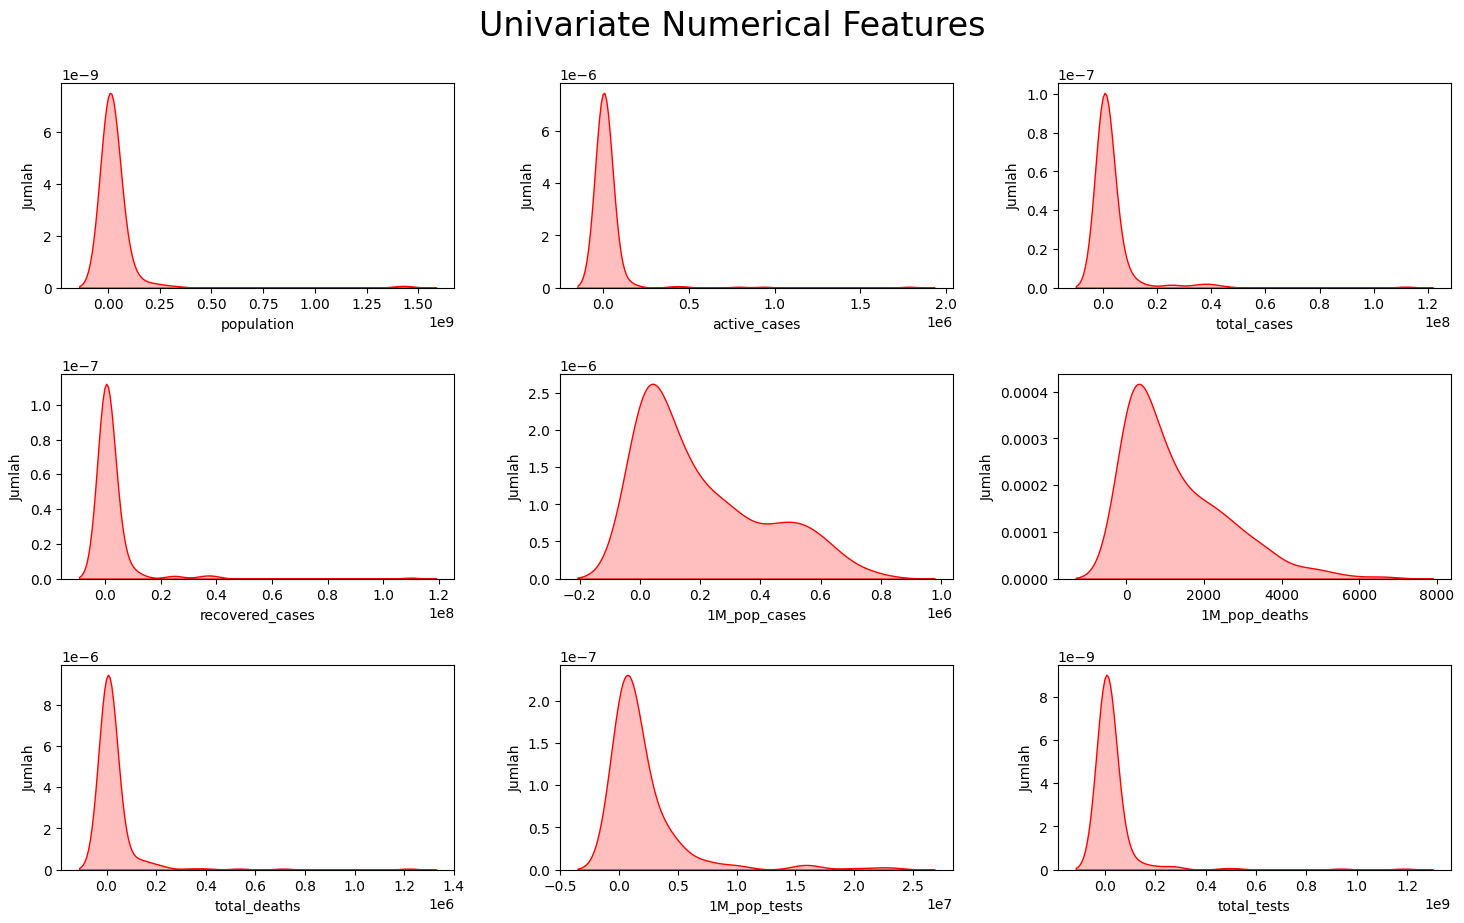

In [1337]:
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Numerical Features", fontsize=24)
for i, feature in enumerate(numericalFeatures):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[feature], fill=True, color='r')
    # sns.histplot(df[numericalFeatures], kde=True, bins=40)
    plt.tight_layout(pad=2)
    plt.xlabel(feature)
    plt.ylabel("Jumlah")
plt.show()

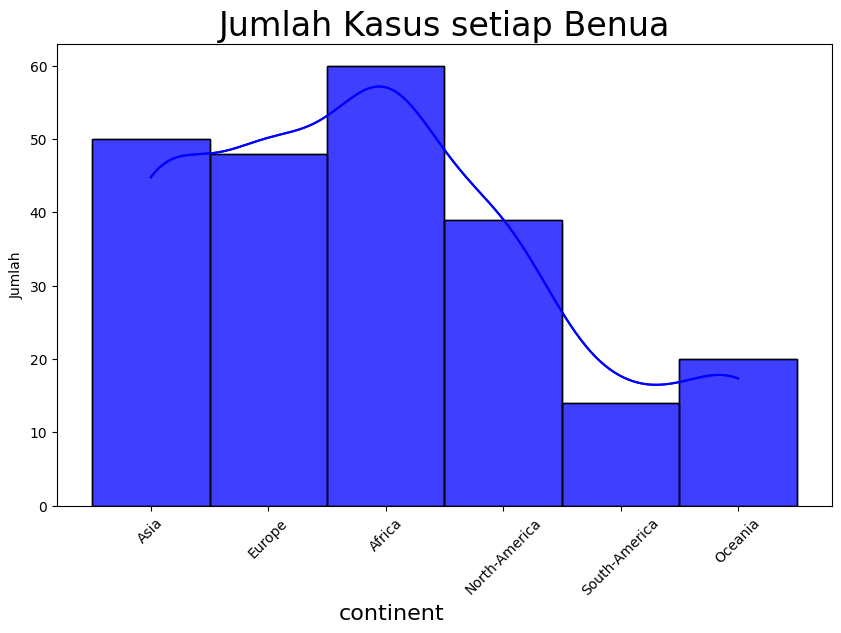

In [1338]:
plt.figure(figsize=(10, 6))
for i in range(len(categoricalFeatures)):
    plt.title("Jumlah Kasus setiap Benua", fontsize=24)
    sns.histplot(df[categoricalFeatures[1]], kde=True, color="blue")
    plt.xlabel(categoricalFeatures[1], fontsize=16, ha="right")
    plt.xticks(rotation=45)
    plt.ylabel("Jumlah")
plt.show()

In [1339]:
df.head()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,15098.0,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,Albania,Europe,2866374.0,1025.0,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,Algeria,Africa,45350148.0,82068.0,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,Andorra,Europe,77463.0,539.0,48015,187078.0,619844.0,2130.0,165.0,3225256.0,249838.0
4,Angola,Africa,35027343.0,1971.0,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


Visualisasi Numerical vs Categorical Features

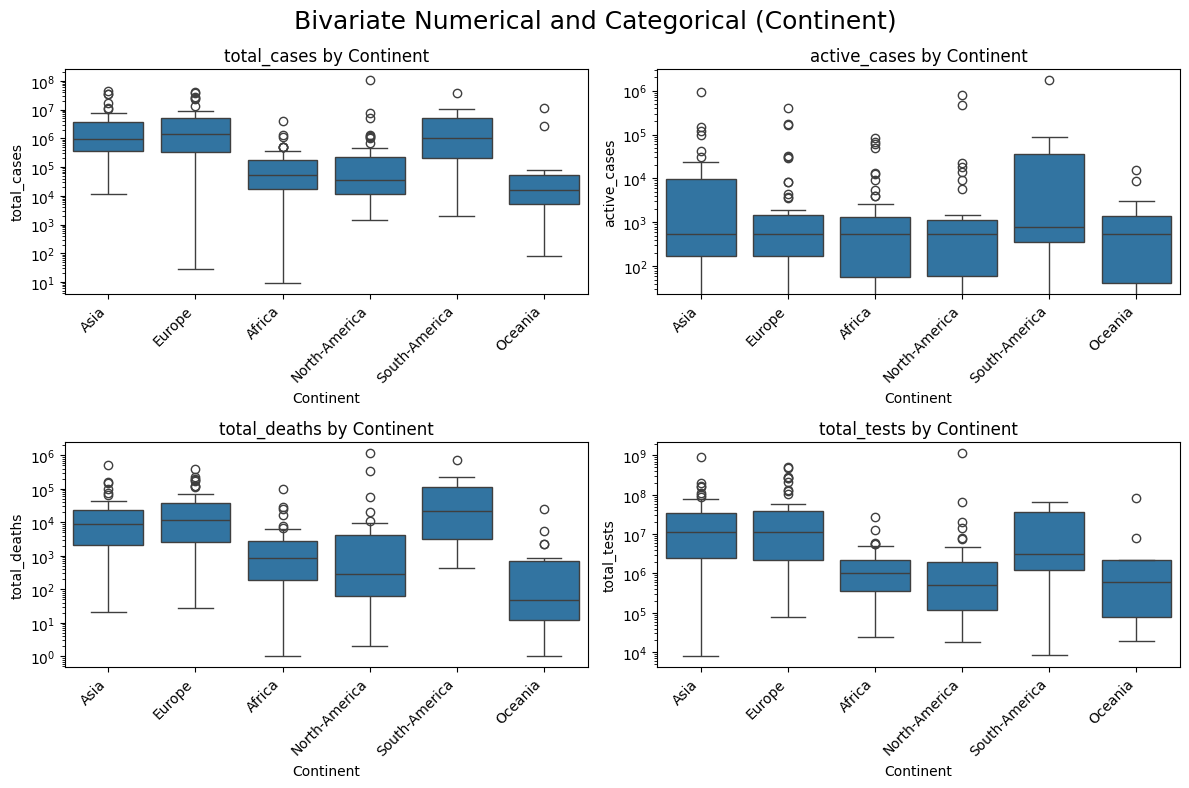

In [1340]:
features = ["total_cases", "active_cases", "total_deaths", "total_tests"]
plt.figure(figsize=(12, 8))
plt.suptitle("Bivariate Numerical and Categorical (Continent)", fontsize=18)
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df["continent"], y=df[feature])
    plt.xticks(rotation=45, fontsize=10, ha="right")
    plt.yscale("log")  # Agar Distribusi Mudah Dibaca
    plt.xlabel("Continent")
    plt.ylabel(feature)
    plt.title(f"{feature} by Continent")
plt.tight_layout()
plt.show()

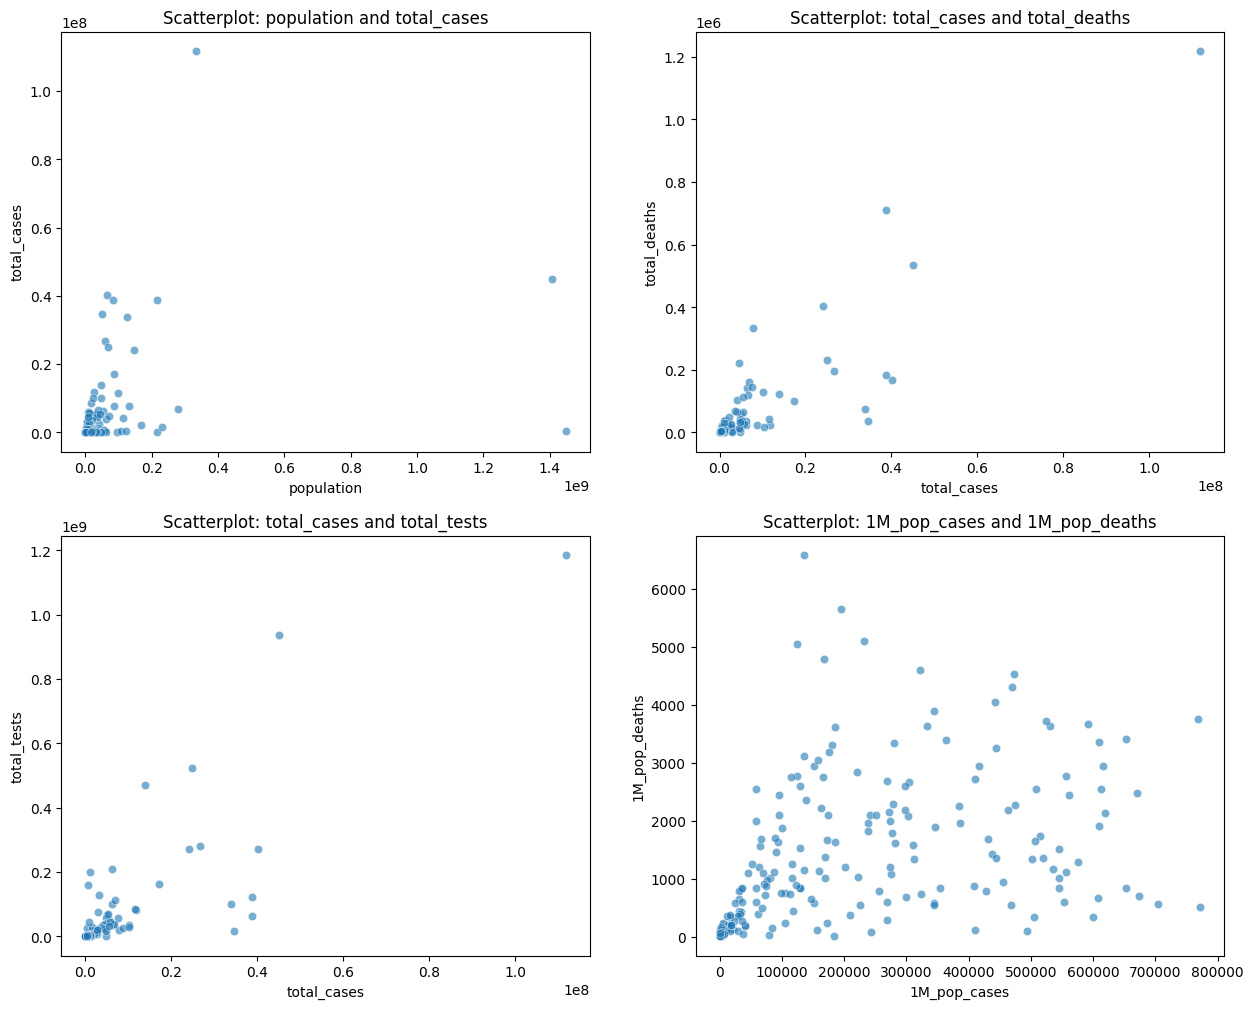

In [1341]:
pairs = [
    ("population", "total_cases"),
    ("total_cases", "total_deaths"),
    ("total_cases", "total_tests"),
    ("1M_pop_cases", "1M_pop_deaths")
]

plt.figure(figsize=(15, 12))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6)
    plt.title(f"Scatterplot: {x} and {y}")

plt.show()

In [1342]:
df.head(5)

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,15098.0,234174,211080.0,5746.0,196.0,7996.0,34125.0,1390730.0
1,Albania,Europe,2866374.0,1025.0,334863,330233.0,116825.0,1258.0,3605.0,677173.0,1941032.0
2,Algeria,Africa,45350148.0,82068.0,272010,183061.0,5998.0,152.0,6881.0,5093.0,230960.0
3,Andorra,Europe,77463.0,539.0,48015,187078.0,619844.0,2130.0,165.0,3225256.0,249838.0
4,Angola,Africa,35027343.0,1971.0,107327,103419.0,3064.0,55.0,1937.0,42818.0,1499795.0


Korelasi Heatmap

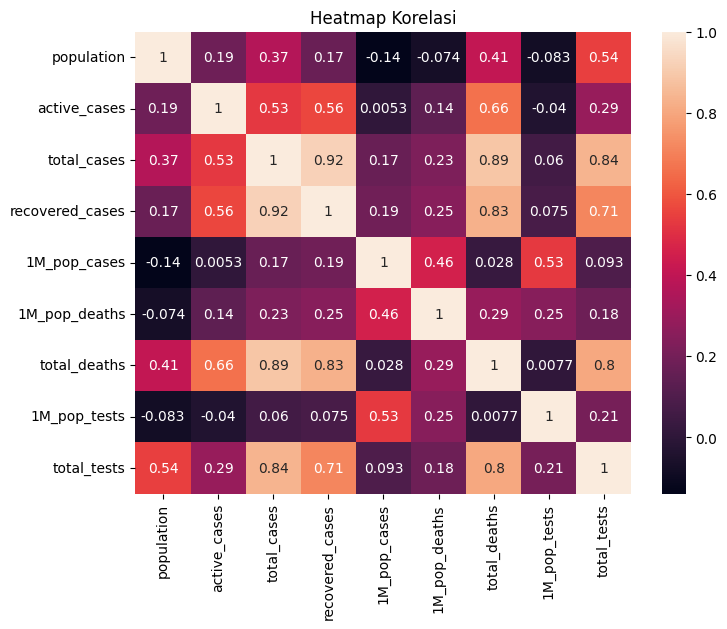

In [1343]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numericalFeatures].corr(), annot=True)
plt.title("Heatmap Korelasi")
plt.show()

## FEATURE ENGINEERING

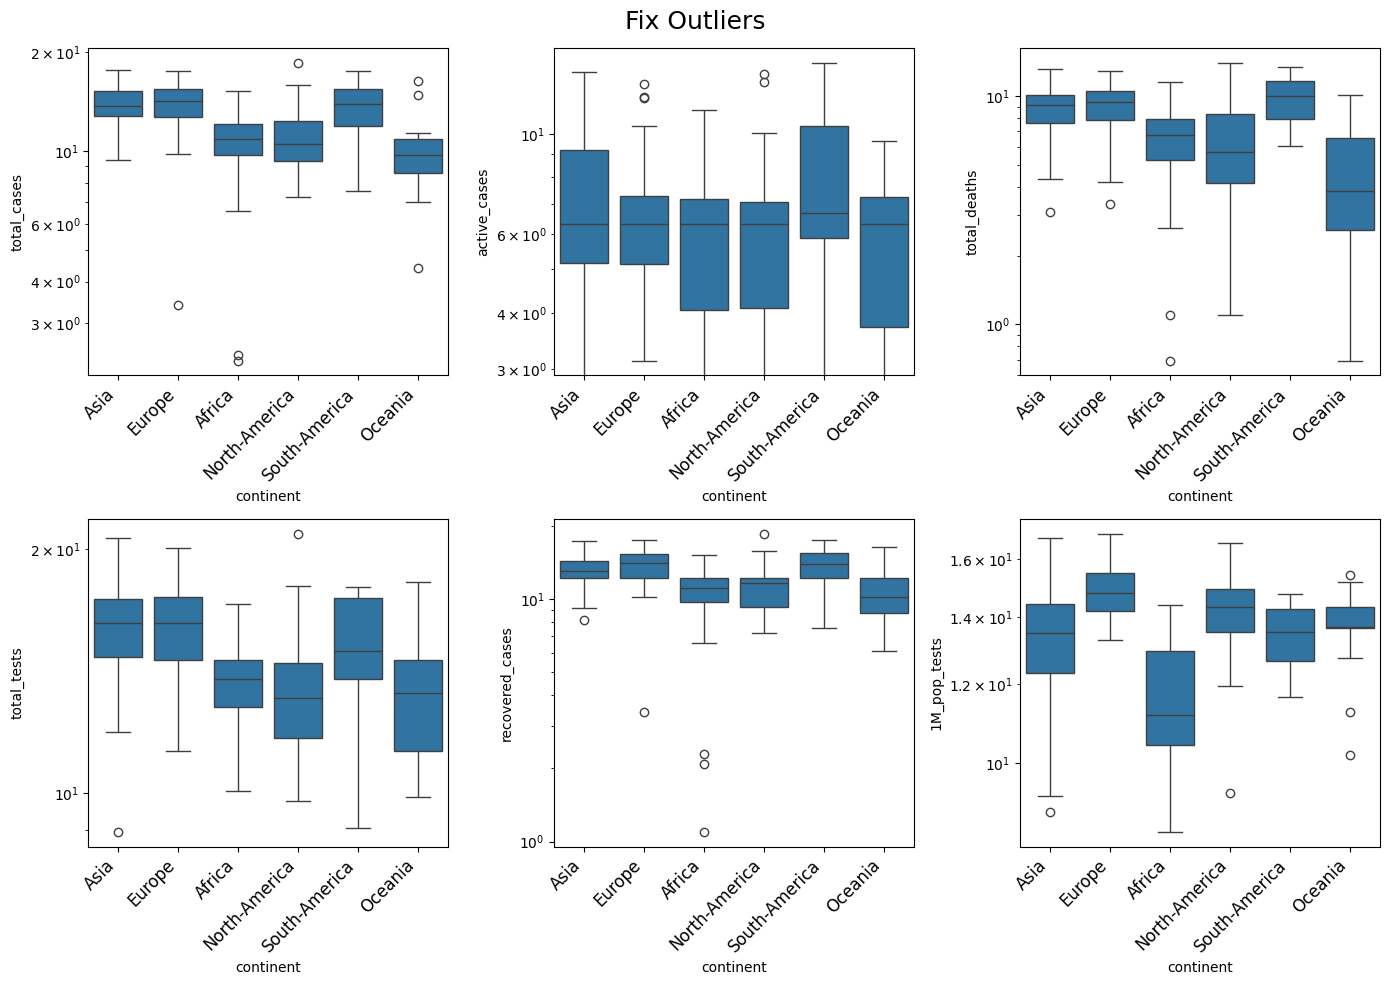

In [1344]:
features = ["total_cases", "active_cases", "total_deaths", "total_tests", "recovered_cases", "1M_pop_tests"]
plt.figure(figsize=(14, 10))
plt.suptitle("Fix Outliers", fontsize=18)
for i, feature in enumerate(features):
  df[feature] = np.log1p(df[feature])
  plt.subplot(2, 3, i+1)
  sns.boxplot(x=df["continent"], y=df[feature], data=df)
  plt.xticks(fontsize=12, ha="right", rotation=45)
  plt.yscale("log")
  plt.tight_layout()
plt.show()

In [1345]:
df.head()

,country,continent,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,Afghanistan,Asia,40754388.0,9.622384,12.363824,12.259997,5746.0,196.0,8.986822,10.437815,14.145340
1,Albania,Europe,2866374.0,6.933423,12.721480,12.707557,116825.0,1258.0,8.190354,13.425684,14.478731
2,Algeria,Africa,45350148.0,11.315316,12.513598,12.117580,5998.0,152.0,8.836665,8.535819,12.350004
3,Andorra,Europe,77463.0,6.291569,10.779290,12.139286,619844.0,2130.0,5.111988,14.986523,12.428572
4,Angola,Africa,35027343.0,7.586804,11.583645,11.546554,3064.0,55.0,7.569412,10.664737,14.220840


Encode Categorical Continent

In [1346]:
# encode = OneHotEncoder()
# encodedContinent = encode.fit_transform(df[["continent"]]).toarray()

ct = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(drop="first", sparse_output=False), ["continent"])
    ],
    remainder="passthrough"
)

encodedContinent = ct.fit_transform(df)

In [ ]:
df = pd.DataFrame(
    encodedContinent,
    columns = ct.get_feature_names_out()
)

In [1348]:
df.columns = df.columns.str.replace("encoder__", "")
df.columns = df.columns.str.replace("remainder__", "")

In [1349]:
df

,continent_Asia,continent_Europe,continent_North-America,continent_Oceania,continent_South-America,country,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,1.0,0.0,0.0,0.0,0.0,Afghanistan,40754388.0,9.622384,12.363824,12.259997,5746.0,196.0,8.986822,10.437815,14.14534
1,0.0,1.0,0.0,0.0,0.0,Albania,2866374.0,6.933423,12.72148,12.707557,116825.0,1258.0,8.190354,13.425684,14.478731
2,0.0,0.0,0.0,0.0,0.0,Algeria,45350148.0,11.315316,12.513598,12.11758,5998.0,152.0,8.836665,8.535819,12.350004
3,0.0,1.0,0.0,0.0,0.0,Andorra,77463.0,6.291569,10.77929,12.139286,619844.0,2130.0,5.111988,14.986523,12.428572
4,0.0,0.0,0.0,0.0,0.0,Angola,35027343.0,7.586804,11.583645,11.546554,3064.0,55.0,7.569412,10.664737,14.22084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,1.0,0.0,Wallis-and-Futuna,10982.0,8.040769,8.174985,6.084499,323256.0,728.0,2.197225,14.440068,9.928619
227,0.0,0.0,0.0,0.0,0.0,Western-Sahara,626161.0,0.0,2.397895,2.302585,16.0,2.0,0.693147,13.693479,14.615814
228,1.0,0.0,0.0,0.0,0.0,Yemen,31154867.0,6.496775,9.388152,9.118773,383.0,69.0,7.677864,9.266721,12.705614
229,0.0,0.0,0.0,0.0,0.0,Zambia,19470234.0,8.273847,12.763701,12.740567,17940.0,209.0,8.311398,12.260774,15.229654


TargetOrdinalEncoding

In [1350]:
meanTotalCases=df.groupby('country')['total_cases'].mean().sort_values()

In [1351]:
meanTotalCases

country
MS-Zaandam           2.302585
Western-Sahara       2.397895
Vatican-City         3.401197
Tokelau              4.394449
Diamond-Princess     6.569481
                      ...    
Brazil              17.472484
Germany             17.474678
France              17.507848
India               17.622959
USA                 18.532402
Name: total_cases, Length: 231, dtype: object

In [1352]:
df["country"] = df["country"].map(meanTotalCases)

In [1353]:
df

,continent_Asia,continent_Europe,continent_North-America,continent_Oceania,continent_South-America,country,population,active_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
0,1.0,0.0,0.0,0.0,0.0,12.363824,40754388.0,9.622384,12.363824,12.259997,5746.0,196.0,8.986822,10.437815,14.14534
1,0.0,1.0,0.0,0.0,0.0,12.72148,2866374.0,6.933423,12.72148,12.707557,116825.0,1258.0,8.190354,13.425684,14.478731
2,0.0,0.0,0.0,0.0,0.0,12.513598,45350148.0,11.315316,12.513598,12.11758,5998.0,152.0,8.836665,8.535819,12.350004
3,0.0,1.0,0.0,0.0,0.0,10.77929,77463.0,6.291569,10.77929,12.139286,619844.0,2130.0,5.111988,14.986523,12.428572
4,0.0,0.0,0.0,0.0,0.0,11.583645,35027343.0,7.586804,11.583645,11.546554,3064.0,55.0,7.569412,10.664737,14.22084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,1.0,0.0,8.174985,10982.0,8.040769,8.174985,6.084499,323256.0,728.0,2.197225,14.440068,9.928619
227,0.0,0.0,0.0,0.0,0.0,2.397895,626161.0,0.0,2.397895,2.302585,16.0,2.0,0.693147,13.693479,14.615814
228,1.0,0.0,0.0,0.0,0.0,9.388152,31154867.0,6.496775,9.388152,9.118773,383.0,69.0,7.677864,9.266721,12.705614
229,0.0,0.0,0.0,0.0,0.0,12.763701,19470234.0,8.273847,12.763701,12.740567,17940.0,209.0,8.311398,12.260774,15.229654


Split Data Into X and Y

In [1354]:
x = df.iloc[:, 6:-1]
y = df.iloc[:, -1]

In [1355]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

Feature Scaling

In [1356]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1357]:
x_train

array([[-0.25225528, -1.75198372, -0.82852072, ..., -0.10712676,
        -1.13357846,  0.94207064],
       [-0.23927282,  0.94825993, -0.55161452, ..., -0.69692035,
        -0.33401603, -0.53610112],
       [-0.0195585 ,  0.10424837,  0.66408618, ..., -0.61156672,
         0.76426523, -0.24181624],
       ...,
       [-0.19340947,  1.27981938,  0.85362161, ...,  3.37786199,
         1.15267622,  0.41789917],
       [-0.25129651, -0.97336987, -1.12207651, ..., -0.68070316,
        -1.10643822, -0.76093678],
       [-0.08146911, -0.58060929, -0.24676363, ..., -0.95468831,
        -0.28329197, -1.1648442 ]], shape=(161, 8))

## LINEAR REGRESSION

In [1358]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


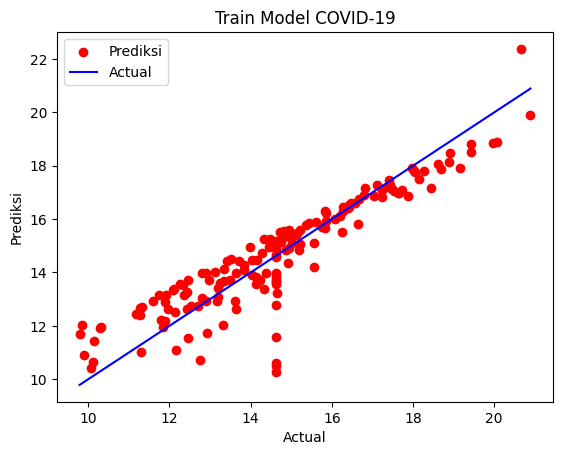

In [1359]:
plt.scatter(y_train, model.predict(x_train), color="red", label="Prediksi")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="blue", label="Actual")
plt.xlabel("Actual")
plt.ylabel("Prediksi")
plt.title("Train Model COVID-19")
plt.legend()
plt.show()

In [1360]:
y_pred = model.predict(x_test)

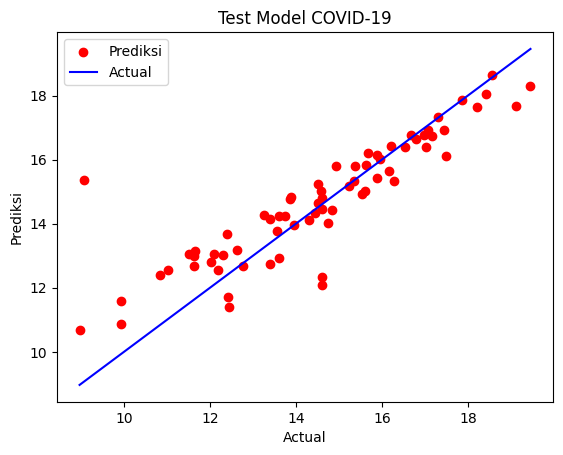

In [1361]:
plt.scatter(y_test, y_pred, color="red", label="Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="blue", label="Actual")
plt.xlabel("Actual")
plt.ylabel("Prediksi")
plt.title("Test Model COVID-19")
plt.legend()
plt.show()

In [1362]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mae,"\n")
print(mse,"\n")
print(r2)

0.756540000954828 

1.3244055531386572 

0.7690587294143975
